In [1]:
import os as _os
import sys as _sys
try:
    _bin_dir = _os.path.dirname(_sys.executable)
    _os.environ["PATH"] += _os.pathsep + _bin_dir
    from pybedtools import paths as _paths
    _paths._set_bedtools_path(_bin_dir)
except ImportError:
    raise ImportError(
        "Please install pybedtools (pip install pybedtools"
    )

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm.notebook import tqdm

from celloracle import motif_analysis as ma
import celloracle as co
co.__version__

'0.16.0'

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [32]:
# Load scATAC-seq peak list.
peaks = pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/downloaded/all_peaks.csv", index_col=0)
peaks = peaks.x.values
peaks = [x.replace("-", "_") for x in peaks]

In [33]:
# Load Cicero coaccessibility scores.
cicero_connections = pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/downloaded/cicero_connections.csv", index_col=0)
cicero_connections.head()

,Peak1,Peak2,coaccess
1,chr10_100006139_100006389,chr10_99774288_99774570,-0.003546
2,chr10_100006139_100006389,chr10_99825945_99826237,-0.027536
3,chr10_100006139_100006389,chr10_99830012_99830311,0.009588
4,chr10_100006139_100006389,chr10_99833211_99833540,-0.008067
5,chr10_100006139_100006389,chr10_99941805_99941955,0.000000


In [51]:
cicero_connections.sort_values("coaccess", ascending=False)

,Peak1,Peak2,coaccess
201796,chr11_115177487_115178105,chr11_115179093_115179639,0.924332
201852,chr11_115179093_115179639,chr11_115177487_115178105,0.924332
207204,chr11_116145835_116146716,chr11_116101842_116102552,0.887688
206914,chr11_116101842_116102552,chr11_116145835_116146716,0.887688
188668,chr11_112501670_112502338,chr11_112976761_112977876,0.876380
...,...,...,...
307427,chr11_62693173_62693828,chr11_62745865_62746789,NaN
307444,chr11_62731152_62732399,chr11_62549614_62552074,NaN
307446,chr11_62731152_62732399,chr11_62602102_62604022,NaN
307453,chr11_62731152_62732399,chr11_62669356_62669970,NaN


In [34]:
# Replace all - with _ in Peak1 and Peak2 fo cicero_connections
cicero_connections["Peak1"] = cicero_connections["Peak1"].str.replace("-", "_")
cicero_connections["Peak2"] = cicero_connections["Peak2"].str.replace("-", "_")

In [35]:
##!! Please make sure to specify the correct reference genome here
tss_annotated = ma.get_tss_info(peak_str_list=peaks, ref_genome="mm10")

# Check results
tss_annotated.tail()

que bed peaks: 86935
tss peaks in que: 17238


,chr,start,end,gene_short_name,strand
17233,chr1,55130650,55132118,Mob4,+
17234,chr6,94499875,94500767,Slc25a26,+
17235,chr19,45659222,45660823,Fbxw4,-
17236,chr12,100898848,100899597,Gpr68,-
17237,chr4,129491262,129492047,Fam229a,-


In [36]:
integrated = ma.integrate_tss_peak_with_cicero(tss_peak=tss_annotated,
                                               cicero_connections=cicero_connections)
print(integrated.shape)
integrated.head()

(44309, 3)


,peak_id,gene_short_name,coaccess
0,chr10_100006139_100006389,Tmtc3,0.017915
1,chr10_100015291_100017830,Kitl,1.000000
2,chr10_100018677_100020384,Kitl,0.146517
3,chr10_100050858_100051762,Kitl,0.069751
4,chr10_100052829_100053395,Kitl,0.202670


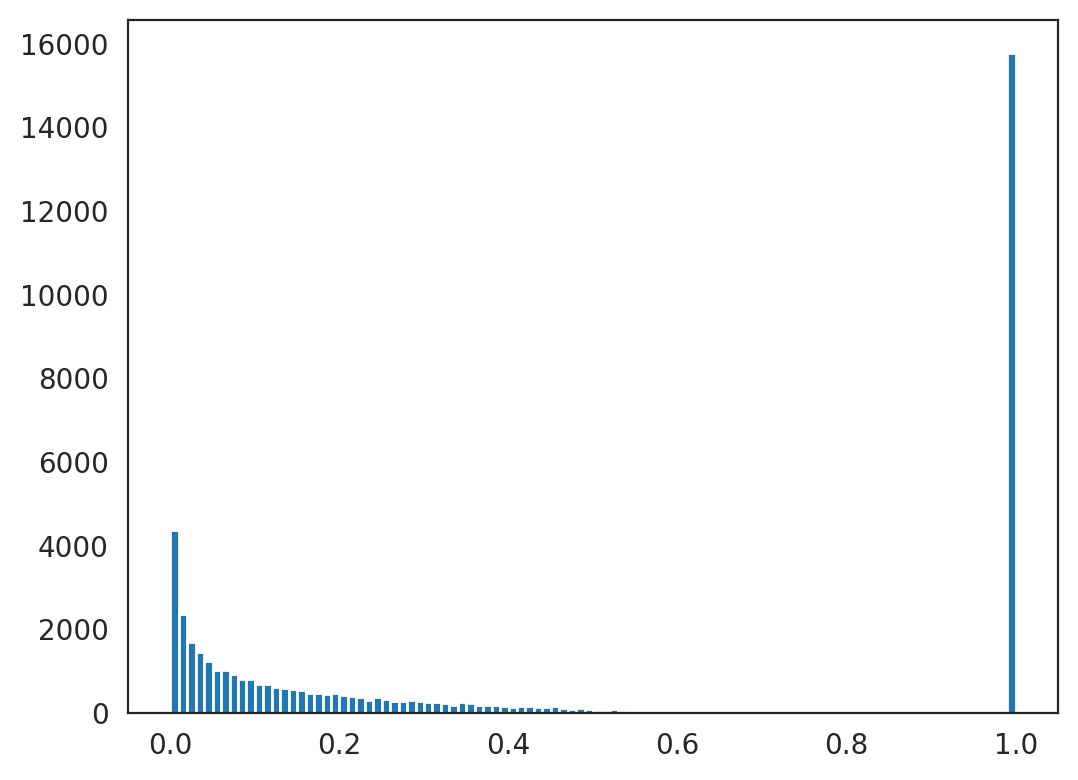

In [49]:
# Histogram of integrated "coaccess"
plt.hist(integrated["coaccess"], bins=100);

In [42]:
peak = integrated[integrated.coaccess >= 0.8]


In [43]:
peak

,peak_id,gene_short_name,coaccess
1,chr10_100015291_100017830,Kitl,1.0
7,chr10_100486534_100488209,Tmtc3,1.0
11,chr10_100588641_100589556,4930430F08Rik,1.0
16,chr10_100741247_100742505,Gm35722,1.0
22,chr10_101681379_101682124,Mgat4c,1.0
...,...,...,...
44304,chrX_99974813_99976454,Eda,1.0
44305,chrY_1009889_1010848,Eif2s3y,1.0
44306,chrY_1245001_1246235,Uty,1.0
44307,chrY_1285657_1286900,Ddx3y,1.0


In [38]:
peak[peak["coaccess"] != 1]

,peak_id,gene_short_name,coaccess


In [39]:
peak = peak[["peak_id", "gene_short_name"]].reset_index(drop=True)

In [41]:
peak

,peak_id,gene_short_name
0,chr10_100015291_100017830,Kitl
1,chr10_100486534_100488209,Tmtc3
2,chr10_100588641_100589556,4930430F08Rik
3,chr10_100741247_100742505,Gm35722
4,chr10_101681379_101682124,Mgat4c
...,...,...
15774,chrX_99974813_99976454,Eda
15775,chrY_1009889_1010848,Eif2s3y
15776,chrY_1245001_1246235,Uty
15777,chrY_1285657_1286900,Ddx3y


In [40]:
peak

,peak_id,gene_short_name
0,chr10_100015291_100017830,Kitl
1,chr10_100486534_100488209,Tmtc3
2,chr10_100588641_100589556,4930430F08Rik
3,chr10_100741247_100742505,Gm35722
4,chr10_101681379_101682124,Mgat4c
...,...,...
15774,chrX_99974813_99976454,Eda
15775,chrY_1009889_1010848,Eif2s3y
15776,chrY_1245001_1246235,Uty
15777,chrY_1285657_1286900,Ddx3y


In [45]:
pd.read_csv("/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/downloaded/processed_peak_file.csv", index_col=0)

,peak_id,gene_short_name
0,chr10_100015291_100017830,Kitl
1,chr10_100486534_100488209,Tmtc3
2,chr10_100588641_100589556,4930430F08Rik
3,chr10_100741247_100742505,Gm35722
4,chr10_101681379_101682124,Mgat4c
...,...,...
15774,chrX_99974813_99976454,Eda
15775,chrY_1009889_1010848,Eif2s3y
15776,chrY_1245001_1246235,Uty
15777,chrY_1285657_1286900,Ddx3y
